<h2>CREDIT CARD FRAUD DETECTION</h2>

<p>Building a model to detect fraudulent credit card transactions. Use a
dataset containing information about credit card transactions, and experiment with algorithms like Logistic Regression, Decision Trees,or Random Forests to classify transactions as fraudulent or legitimate.</p>

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.54      0.53       103
           1       0.48      0.45      0.47        97

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.50      0.50       200

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.54      0.55       103
           1       0.53      0.54      0.53        97

    accuracy                           0.54       200
   macro avg       0.54      0.54      0.54       200
weighted avg       0.54      0.54      0.54       200

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.51      0.50       103
           1       0.46      0.43      0.44        97

    accuracy                           0.47       200
   macro av

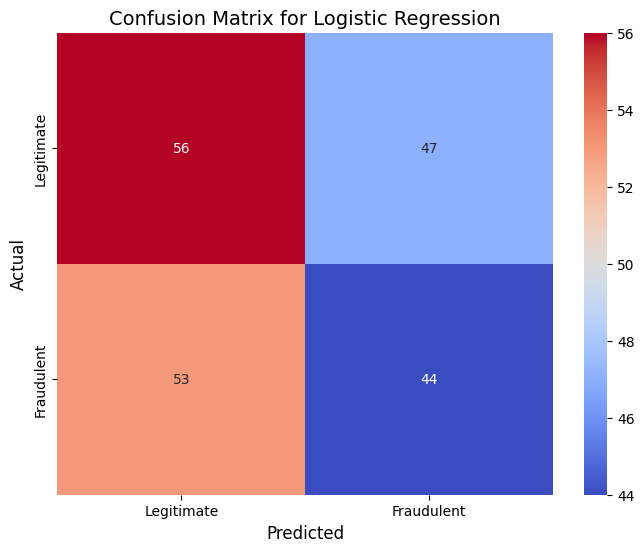

Confusion Matrix for Logistic Regression:
[[56 47]
 [53 44]]




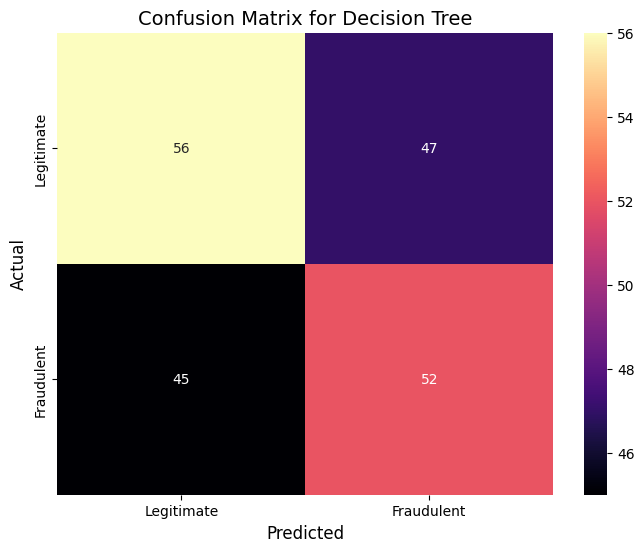

Confusion Matrix for Decision Tree:
[[56 47]
 [45 52]]




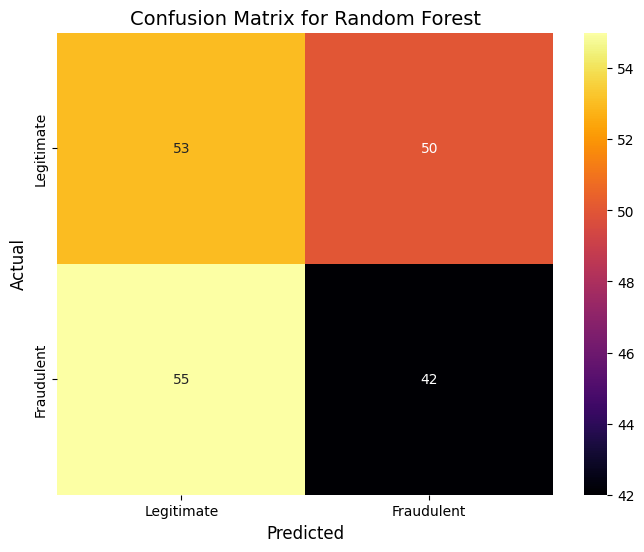

Confusion Matrix for Random Forest:
[[53 50]
 [55 42]]




C:\Users\ladis\AppData\Local\Temp\ipykernel_10756\1098077447.py:66: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.barh(features, feature_importance, color=plt.cm.get_cmap(cmap)(feature_importance / max(feature_importance)))


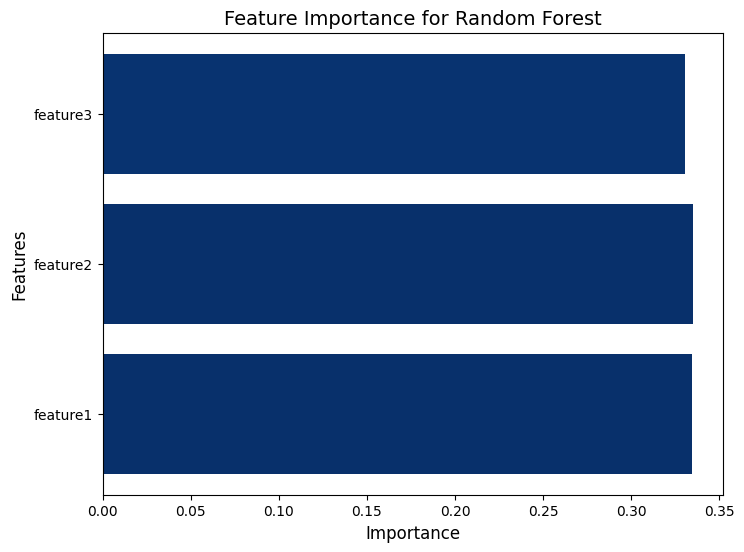

Feature Importance for Random Forest:
[('feature1', 0.33457014276530256), ('feature2', 0.33500528231714694), ('feature3', 0.33042457491755056)]




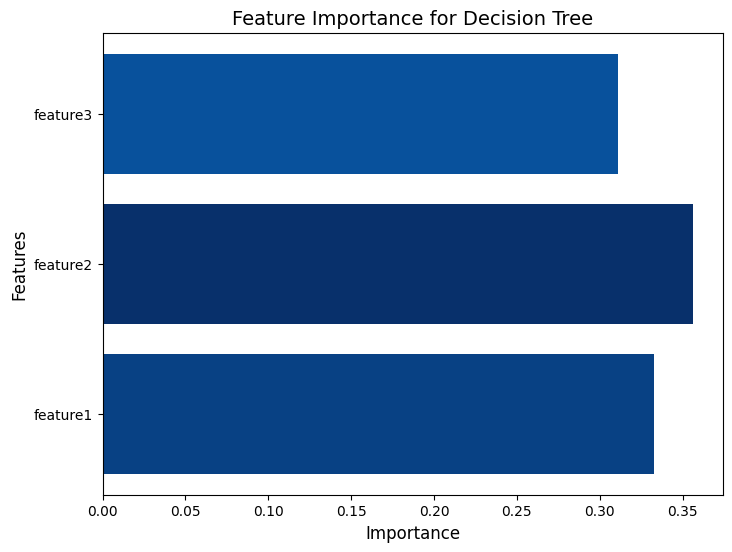

Feature Importance for Decision Tree:
[('feature1', 0.3329250467943129), ('feature2', 0.35627729158807464), ('feature3', 0.31079766161761246)]




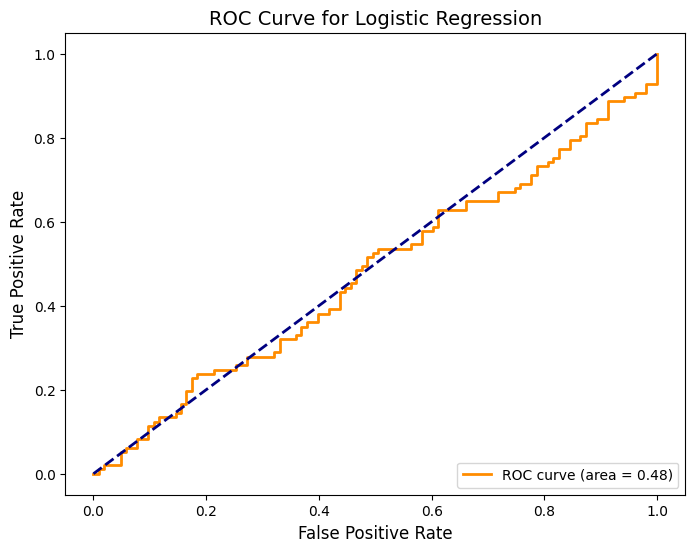

ROC AUC for Logistic Regression: 0.48



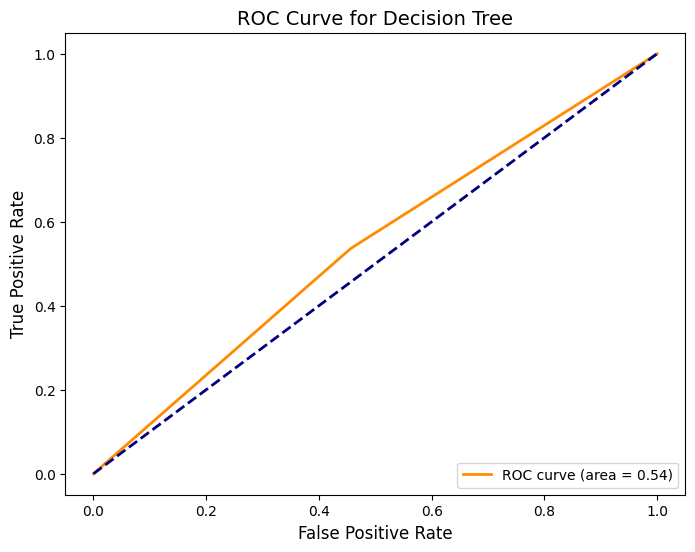

ROC AUC for Decision Tree: 0.54



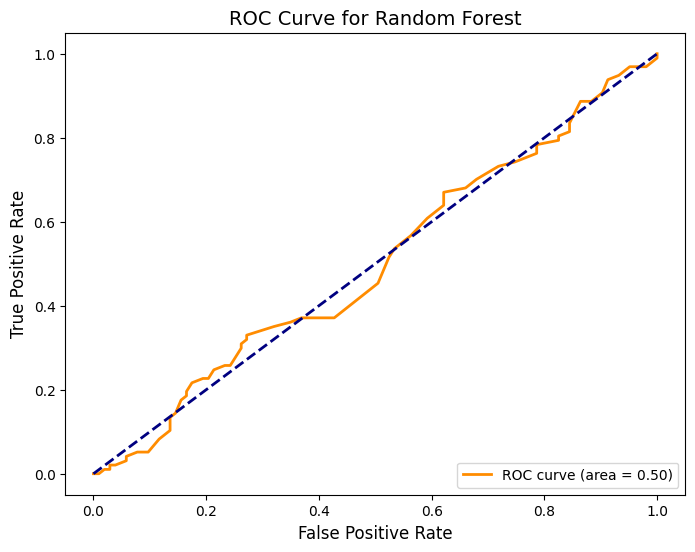

ROC AUC for Random Forest: 0.50



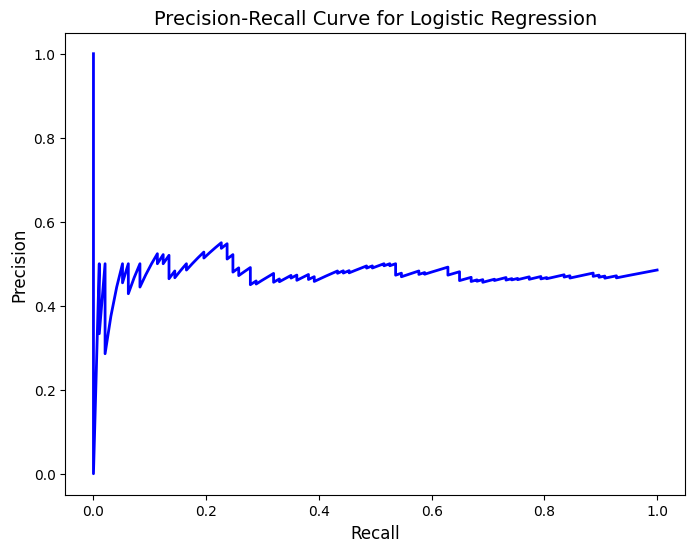

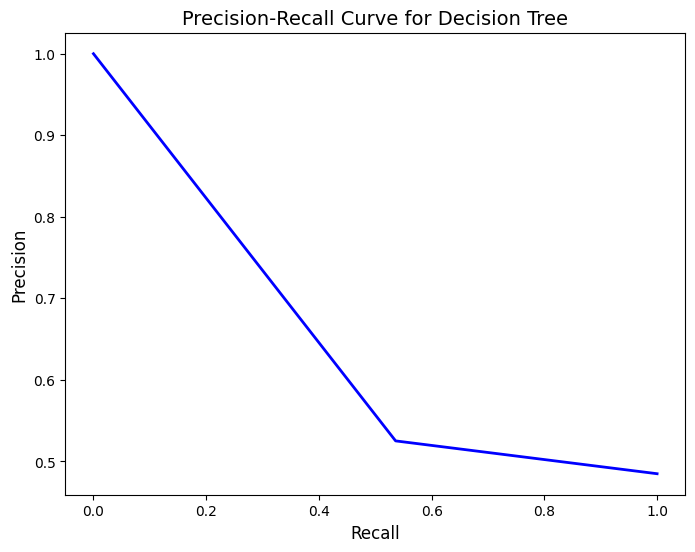

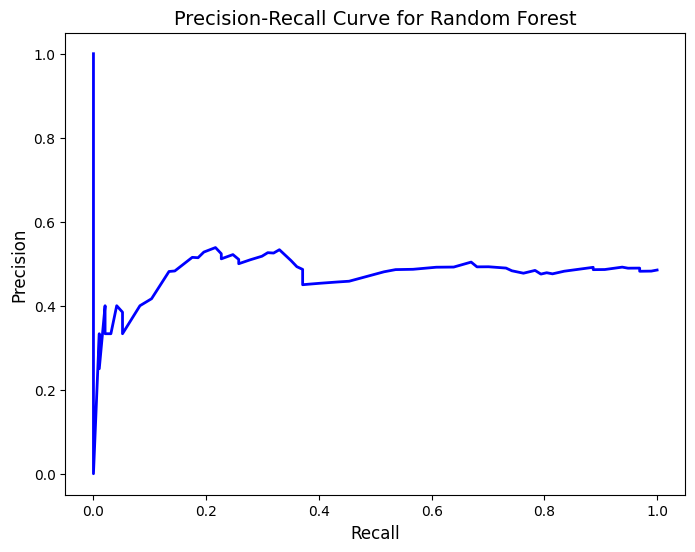

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve

# Load your dataset (replace with actual dataset)
data=pd.read_csv(r"D:\CODSOFT\dataset-2\fraudTrain.csv")

data = pd.DataFrame({
    'feature1': np.random.randn(1000),
    'feature2': np.random.randn(1000),
    'feature3': np.random.randn(1000),
    'is_fraud': np.random.choice([0, 1], size=1000)
})

# Splitting data into features (X) and target (y)
X = data.drop(columns=['is_fraud'])
y = data['is_fraud']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (scaling features)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Decision Tree Model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)

# Random Forest Model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name, cmap='viridis'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])
    plt.title(f'Confusion Matrix for {model_name}', fontsize=14)
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.show()
    print(f"Confusion Matrix for {model_name}:")
    print(cm)
    print("\n")

# Function to plot feature importance (for Random Forest and Decision Tree)
def plot_feature_importance(model, model_name, cmap='coolwarm'):
    feature_importance = model.feature_importances_
    features = X.columns
    plt.figure(figsize=(8, 6))
    plt.barh(features, feature_importance, color=plt.cm.get_cmap(cmap)(feature_importance / max(feature_importance)))
    plt.title(f'Feature Importance for {model_name}', fontsize=14)
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.show()
    print(f"Feature Importance for {model_name}:")
    print(list(zip(features, feature_importance)))
    print("\n")

# Function to plot ROC Curve
def plot_roc_curve(model, model_name):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.title(f'ROC Curve for {model_name}', fontsize=14)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.legend(loc='lower right')
    plt.show()
    print(f"ROC AUC for {model_name}: {roc_auc:.2f}\n")

# Function to plot Precision-Recall Curve
def plot_precision_recall_curve(model, model_name):
    precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='b', lw=2)
    plt.title(f'Precision-Recall Curve for {model_name}', fontsize=14)
    plt.xlabel('Recall', fontsize=12)
    plt.ylabel('Precision', fontsize=12)
    plt.show()

# Classification Report for each model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix for each model
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_tree = confusion_matrix(y_test, y_pred_tree)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plotting confusion matrices with different colormaps
plot_confusion_matrix(cm_logreg, "Logistic Regression", cmap='coolwarm')
plot_confusion_matrix(cm_tree, "Decision Tree", cmap='magma')
plot_confusion_matrix(cm_rf, "Random Forest", cmap='inferno')

# Plot Feature Importance for Random Forest and Decision Tree
plot_feature_importance(random_forest, "Random Forest", cmap='Blues')
plot_feature_importance(decision_tree, "Decision Tree", cmap='Blues')

# Plot ROC Curve for each model
plot_roc_curve(logreg, "Logistic Regression")
plot_roc_curve(decision_tree, "Decision Tree")
plot_roc_curve(random_forest, "Random Forest")

# Plot Precision-Recall Curve for each model
plot_precision_recall_curve(logreg, "Logistic Regression")
plot_precision_recall_curve(decision_tree, "Decision Tree")
plot_precision_recall_curve(random_forest, "Random Forest")
